# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
%matplotlib notebook

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import json
from pprint import pprint


# Import API key
p = os.path.join("..","..","..","openWeather_api_key.txt")
f = open(p, "r")
api_key = f.read()
f.close()

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

cities_df = pd.DataFrame({"cities": cities})
cities_df.head()

606


cities
0  punta arenas
1       ushuaia
2       qaanaaq
3      hermanus
4        castro

In [6]:
#Verifying that the list of cities is unique if len(cities) = cities_df['cities'].value_counts().
print(f"{len(cities)} vs {len(cities_df['cities'].value_counts())}")
if len(cities) == len(cities_df['cities'].value_counts()):
    print("We already have a list of unique cities\n")
    print(cities_df['cities'].value_counts())
else:
    #overwriting cities list with unique values
    cities = cities_df['cities'].value_counts().tolist()
    print("Creating a list of unique cities from dataframe")
    pprint(cities)

606 vs 606
We already have a list of unique cities

saint-joseph               1
poli                       1
lloydminster               1
port macquarie             1
busselton                  1
kapaa                      1
torit                      1
uige                       1
pacatuba                   1
sangueya                   1
carnarvon                  1
japura                     1
port blair                 1
vysokogornyy               1
hilo                       1
osoyoos                    1
grand gaube                1
lima                       1
leninskoye                 1
te anau                    1
nemuro                     1
auki                       1
severo-kurilsk             1
atuona                     1
ukiah                      1
roald                      1
namatanai                  1
manokwari                  1
kaspiyskiy                 1
bull savanna               1
                          ..
boa vista                  1
katsuura            

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
print(f"Beginning Data Retrieval\n{'-'*30}")
#For make a request for each city
#Keeping track of failed cities' index
cities_fail = list()
try:
    for x in range(len(cities)):
        print(f"Processing Record {x} | {cities[x]}")
        # Build query URL and request your results in Celsius
        url = "http://api.openweathermap.org/data/2.5/forecast?"
        url = url +"APPID="+api_key+"&q="+cities[x]+"&units=metric"
        # Get weather data
        response = requests.get(url)

        #Checking to see if the call was a success
        if response.status_code == 200:
            
            #saving json in tmp folder as backup in case city call fails
            with open(f"tmp/{cities[x]}.json", 'w') as fp:
                json.dump(response.json(), fp)
        else:
            print("City not found. Skipping...")
            cities_fail.append({"name":cities[x], "index":x, "error":response.status_code})
    print(f"{'-'*30}\nData Retrieval Complete\n{'-'*30}")
except:
    print("something went wrong...")
    raise

Beginning Data Retrieval
------------------------------
Processing Record 0 | punta arenas
Processing Record 1 | ushuaia
Processing Record 2 | qaanaaq
Processing Record 3 | hermanus
Processing Record 4 | castro
Processing Record 5 | aflu
City not found. Skipping...
Processing Record 6 | dingle
Processing Record 7 | hamilton
Processing Record 8 | kapaa
Processing Record 9 | sao gabriel
Processing Record 10 | walvis bay
Processing Record 11 | margate
Processing Record 12 | dikson
Processing Record 13 | rikitea
Processing Record 14 | puerto ayora
Processing Record 15 | arraial do cabo
Processing Record 16 | asyut
Processing Record 17 | comodoro rivadavia
Processing Record 18 | albany
Processing Record 19 | manokwari
Processing Record 20 | longyearbyen
Processing Record 21 | neka
Processing Record 22 | pisco
Processing Record 23 | wote
Processing Record 24 | maniitsoq
Processing Record 25 | caravelas
Processing Record 26 | naze
Processing Record 27 | porirua
Processing Record 28 | katsuura

Processing Record 226 | abaete
Processing Record 227 | turukhansk
Processing Record 228 | bismarck
Processing Record 229 | charlottesville
Processing Record 230 | batuan
Processing Record 231 | korla
City not found. Skipping...
Processing Record 232 | mar del plata
Processing Record 233 | aykhal
Processing Record 234 | puerto carreno
Processing Record 235 | khatanga
Processing Record 236 | kalabo
Processing Record 237 | praia da vitoria
Processing Record 238 | yar-sale
Processing Record 239 | jalu
Processing Record 240 | chuy
Processing Record 241 | chengde
Processing Record 242 | artyk
City not found. Skipping...
Processing Record 243 | sangueya
Processing Record 244 | koslan
Processing Record 245 | baiao
Processing Record 246 | san policarpo
Processing Record 247 | salalah
Processing Record 248 | san quintin
Processing Record 249 | avera
Processing Record 250 | shediac
Processing Record 251 | airai
Processing Record 252 | bandarbeyla
Processing Record 253 | emba
Processing Record 254

Processing Record 453 | karasjok
Processing Record 454 | macaboboni
City not found. Skipping...
Processing Record 455 | port lincoln
Processing Record 456 | mezhova
Processing Record 457 | yulara
Processing Record 458 | codajas
Processing Record 459 | ilulissat
Processing Record 460 | ambunti
Processing Record 461 | tasbuget
City not found. Skipping...
Processing Record 462 | maridi
City not found. Skipping...
Processing Record 463 | naftah
City not found. Skipping...
Processing Record 464 | sentyabrskiy
City not found. Skipping...
Processing Record 465 | araouane
Processing Record 466 | santiago del estero
Processing Record 467 | chute-aux-outardes
Processing Record 468 | healdsburg
Processing Record 469 | aksarka
Processing Record 470 | lewistown
Processing Record 471 | provideniya
Processing Record 472 | alfonsine
Processing Record 473 | nelson bay
Processing Record 474 | kondinskoye
Processing Record 475 | paita
Processing Record 476 | stoyba
City not found. Skipping...
Processing 

In [70]:
#Getting the Data that was retrieved

list_jsons = os.listdir('tmp')
len(list_jsons)


534

In [71]:
#City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
CityName = list()
Cloudiness = list()
CountryCode = list()
Date = list()
Humidity = list()
Lat = list()
Lng = list()
MaxTemp = list()
WindSpeed = list()

#for file in list_jsons:
for x in range(len(list_jsons)):
    try:
        print(f"loading and parsing data for {list_jsons[x]} | {x+1} of {len(list_jsons)}")
        with open(f"tmp/{list_jsons[x]}") as jsonfile:
            cityDict = json.load(jsonfile)
            
            #Getting data from json, in case of error
            name = cityDict['city']['name']
            cloud = cityDict['list'][0]['clouds']['all']
            cCode = cityDict['city']['country']
            fecha = cityDict['list'][0]['dt']
            Humid = cityDict['list'][0]['main']['humidity']
            Latit = cityDict['city']['coord']['lat']
            Longi = cityDict['city']['coord']['lon']
            temp = cityDict['list'][0]['main']['temp_max']
            speed = cityDict['list'][0]['wind']['speed']
            
            #Saving Data for each city that worked (No errors/exceptions were raised)
            CityName.append(name)
            Cloudiness.append(cloud)
            CountryCode.append(cCode)
            Date.append(fecha)
            Humidity.append(Humid)
            Lat.append(Latit)
            Lng.append(Longi)
            MaxTemp.append(temp)
            WindSpeed.append(speed)

    except IOError:
        print(f"Error with {list_jsons[x]}")
        raise
    except:
        print("Something went wrong...")
        raise
print(f"\n{'-'*30}\nFinished Loading, Parsing and extracting Data\n{'-'*30}")

if(len(CityName) == len(list_jsons)):
    print(f"No errors found, task finished successfully\n{'-'*30}")
else:
    print(f"There were {len(list_jsons)-len(CityName)} errors!!!\n{'-'*30}")

loading and parsing data for abaete.json | 1 of 534
loading and parsing data for abu dhabi.json | 2 of 534
loading and parsing data for abu samrah.json | 3 of 534
loading and parsing data for acapulco.json | 4 of 534
loading and parsing data for adrar.json | 5 of 534
loading and parsing data for ahipara.json | 6 of 534
loading and parsing data for airai.json | 7 of 534
loading and parsing data for aklavik.json | 8 of 534
loading and parsing data for aksarka.json | 9 of 534
loading and parsing data for albany.json | 10 of 534
loading and parsing data for alfonsine.json | 11 of 534
loading and parsing data for alice springs.json | 12 of 534
loading and parsing data for alihe.json | 13 of 534
loading and parsing data for along.json | 14 of 534
loading and parsing data for alta floresta.json | 15 of 534
loading and parsing data for altay.json | 16 of 534
loading and parsing data for ambilobe.json | 17 of 534
loading and parsing data for ambunti.json | 18 of 534
loading and parsing data for

loading and parsing data for kralendijk.json | 243 of 534
loading and parsing data for kruisfontein.json | 244 of 534
loading and parsing data for kucevo.json | 245 of 534
loading and parsing data for kuching.json | 246 of 534
loading and parsing data for kununurra.json | 247 of 534
loading and parsing data for kwinana.json | 248 of 534
loading and parsing data for lagoa.json | 249 of 534
loading and parsing data for laguna.json | 250 of 534
loading and parsing data for lambarene.json | 251 of 534
loading and parsing data for laredo.json | 252 of 534
loading and parsing data for lashio.json | 253 of 534
loading and parsing data for lata.json | 254 of 534
loading and parsing data for lavrentiya.json | 255 of 534
loading and parsing data for lebu.json | 256 of 534
loading and parsing data for leningradskiy.json | 257 of 534
loading and parsing data for leninskoye.json | 258 of 534
loading and parsing data for lewistown.json | 259 of 534
loading and parsing data for lima.json | 260 of 534

loading and parsing data for vagamo.json | 497 of 534
loading and parsing data for vaini.json | 498 of 534
loading and parsing data for vaitape.json | 499 of 534
loading and parsing data for vallenar.json | 500 of 534
loading and parsing data for valley city.json | 501 of 534
loading and parsing data for vardo.json | 502 of 534
loading and parsing data for varkaus.json | 503 of 534
loading and parsing data for victoria.json | 504 of 534
loading and parsing data for vieques.json | 505 of 534
loading and parsing data for vila velha.json | 506 of 534
loading and parsing data for villanueva de la serena.json | 507 of 534
loading and parsing data for voh.json | 508 of 534
loading and parsing data for vostok.json | 509 of 534
loading and parsing data for vysokogornyy.json | 510 of 534
loading and parsing data for waingapu.json | 511 of 534
loading and parsing data for waipawa.json | 512 of 534
loading and parsing data for walvis bay.json | 513 of 534
loading and parsing data for warangal.jso

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [72]:
citiesDF = pd.DataFrame({
                        "City": CityName,
                        "Cloudiness": Cloudiness,
                        "CountryCode": CountryCode,
                        "Date": Date,
                        "Humidity": Humidity,
                        "Lat": Lat,
                        "Lng": Lng,
                        "MaxTemp": MaxTemp,
                        "WindSpeed": WindSpeed
                        })
print(citiesDF.count())
citiesDF.head(10)

City           534
Cloudiness     534
CountryCode    534
Date           534
Humidity       534
Lat            534
Lng            534
MaxTemp        534
WindSpeed      534
dtype: int64


City  Cloudiness CountryCode        Date  Humidity      Lat  \
0      Abaete          44          BR  1547175600        75 -19.1600   
1   Abu Dhabi          20          AE  1547175600        95  24.4748   
2  Abu Samrah           0          SY  1547175600        85  35.3029   
3    Acapulco           0          MX  1547175600        84  16.8603   
4       Adrar           0          DZ  1547175600        54  27.8734   
5     Ahipara          36          NZ  1547175600        67 -35.1665   
6       Airai          32          TL  1547175600        83  -8.9266   
7     Aklavik          76          CA  1547175600        46  68.2183   
8     Aksarka          32          RU  1547175600         0  66.5606   
9      Albany          80          US  1547175600        59  42.6512   

        Lng  MaxTemp  WindSpeed  
0  -45.4459    21.51       0.91  
1   54.3706    20.04       8.36  
2   37.1841    -2.09       2.21  
3  -99.8769    24.17       3.16  
4   -0.2875     3.40       1.31  
5  173.1562    24.69       4.21  
6  125.4092    27.41       0.81  
7 -135.0136   -30.80       2.41  
8   67.7975   -30.32       3.71  
9  -73.7550    -4.62       4.36

In [73]:
#Exporting data as csv
try:
    citiesDF.to_csv(output_data_file)
    #os.system("rm tmp/*.json")
except:
    print("Something Went Wrong...")
    raise

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


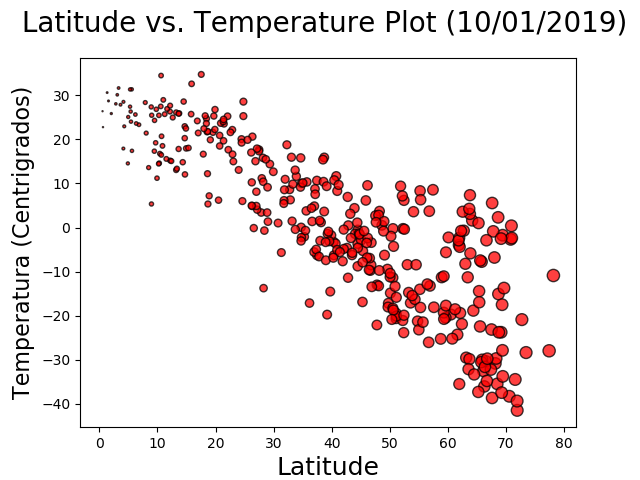

C:\Users\Kamino\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [99]:

plt.figure().suptitle(' Latitude vs. Temperature Plot (10/01/2019)', fontsize=20)
plt.scatter(Lat, MaxTemp, marker="o", facecolors="red", edgecolors="black",
            s=Lat, alpha=0.75)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Temperatura (Centrigrados)', fontsize=16)
plt.savefig('Latitude vs Temperature Plot.png')

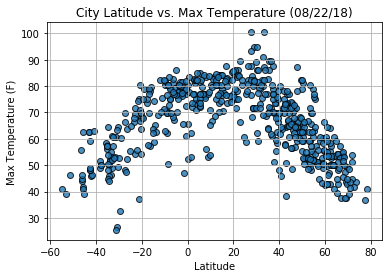

In [6]:
#Este es el ejemplo original de la tarea, la deje tal cual para tener una referencia

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


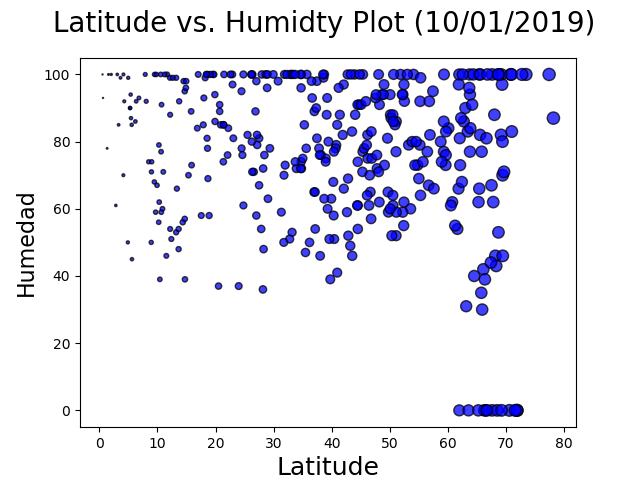

C:\Users\Kamino\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [98]:
plt.figure().suptitle(' Latitude vs. Humidty Plot (10/01/2019)', fontsize=20)
plt.scatter(Lat, Humidity, marker="o", facecolors="blue", edgecolors="black",
            s=Lat, alpha=0.75)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Humedad', fontsize=16)
plt.savefig('Latitude vs Humidty Plot.png')

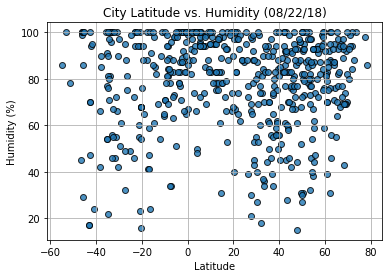

In [7]:
#Este es el ejemplo original de la tarea, la deje tal cual para tener una referencia

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


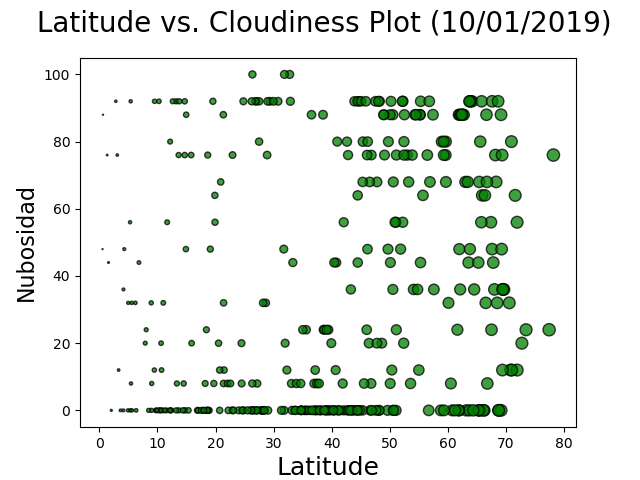

C:\Users\Kamino\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [97]:
plt.figure().suptitle(' Latitude vs. Cloudiness Plot (10/01/2019)', fontsize=20)
plt.scatter(Lat, Cloudiness, marker="o", facecolors="green", edgecolors="black",
            s=Lat, alpha=0.75)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Nubosidad', fontsize=16)
plt.savefig('Latitude vs Cloudiness Plot.png')

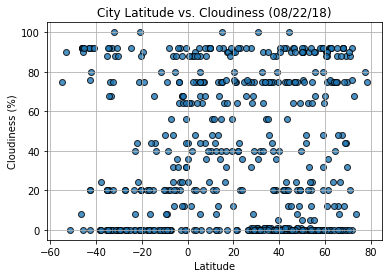

In [8]:
#Este es el ejemplo original de la tarea, la deje tal cual para tener una referencia

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


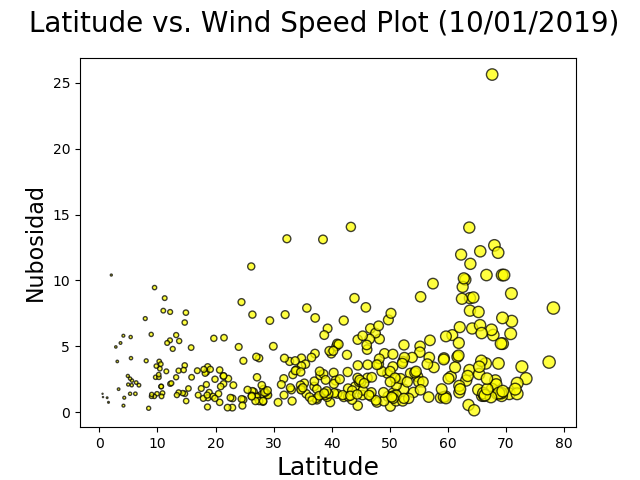

C:\Users\Kamino\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [96]:
plt.figure().suptitle(' Latitude vs. Wind Speed Plot (10/01/2019)', fontsize=20)
plt.scatter(Lat, WindSpeed, marker="o", facecolors="yellow", edgecolors="black",
            s=Lat, alpha=0.75)
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Nubosidad', fontsize=16)
plt.savefig('Latitude vs WindSpeed Plot.png')

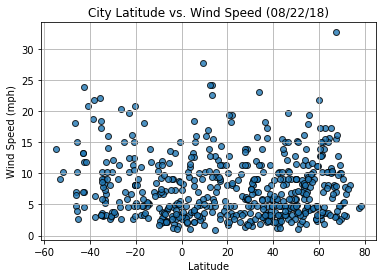

In [9]:
#Este es el ejemplo original de la tarea, la deje tal cual para tener una referencia